## IMPORTS

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle_reg as wr

## ACQUIRE & PREPARE 

In [2]:
df = wr.get_zillow()

In [3]:
df.info

<bound method DataFrame.info of          bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet    fips  \
0               0.0          0.0                           NaN  6037.0   
1               0.0          0.0                           NaN  6037.0   
2               0.0          0.0                           NaN  6037.0   
3               0.0          0.0                           NaN  6037.0   
4               4.0          2.0                        3633.0  6037.0   
...             ...          ...                           ...     ...   
1499995         4.0          3.0                        2390.0  6037.0   
1499996         3.0          3.0                        2004.0  6037.0   
1499997         3.0          2.0                        2323.0  6037.0   
1499998         3.0          3.0                        1897.0  6037.0   
1499999         3.0          2.0                        1632.0  6037.0   

         lotsizesquarefeet  taxvaluedollarcnt  yearbuilt  assessmentyear  \
0  

In [4]:
df= wr.prep_zillow(df)

In [5]:
df.head()

,beds,baths,sq_ft,fips,lot_size,tax_val,year,assessmentyear,tax_amt
4,4.0,2.0,3633.0,6037.0,9826.0,296425.0,2005.0,2016.0,6941.39
7,3.0,2.0,2077.0,6037.0,6490.0,646760.0,1926.0,2016.0,7924.68
11,0.0,0.0,1200.0,6037.0,4054.0,5328.0,1972.0,2016.0,91.60
14,0.0,0.0,171.0,6037.0,13002.0,6920.0,1973.0,2016.0,255.17
15,0.0,0.0,203.0,6037.0,17359.0,14166.0,1960.0,2016.0,163.79


In [6]:
zillow = df
zillow.head()

,beds,baths,sq_ft,fips,lot_size,tax_val,year,assessmentyear,tax_amt
4,4.0,2.0,3633.0,6037.0,9826.0,296425.0,2005.0,2016.0,6941.39
7,3.0,2.0,2077.0,6037.0,6490.0,646760.0,1926.0,2016.0,7924.68
11,0.0,0.0,1200.0,6037.0,4054.0,5328.0,1972.0,2016.0,91.60
14,0.0,0.0,171.0,6037.0,13002.0,6920.0,1973.0,2016.0,255.17
15,0.0,0.0,203.0,6037.0,17359.0,14166.0,1960.0,2016.0,163.79


In [7]:
zillow.describe()

,beds,baths,sq_ft,fips,lot_size,tax_val,year,assessmentyear,tax_amt
count,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06,1.483530e+06
mean,3.300795e+00,2.236626e+00,1.860440e+03,6.048365e+03,1.093704e+04,4.587130e+05,1.960849e+03,2.015999e+03,5.589463e+03
std,9.296686e-01,9.859989e-01,1.239380e+03,2.041563e+01,3.144265e+05,6.676022e+05,2.202667e+01,3.293850e-02,7.696331e+03
min,0.000000e+00,0.000000e+00,1.000000e+00,6.037000e+03,1.040000e+02,2.200000e+01,1.801000e+03,2.014000e+03,1.336000e+01
25%,3.000000e+00,2.000000e+00,1.258000e+03,6.037000e+03,5.637000e+03,1.887460e+05,1.949000e+03,2.016000e+03,2.536443e+03
50%,3.000000e+00,2.000000e+00,1.622000e+03,6.037000e+03,6.760000e+03,3.276710e+05,1.958000e+03,2.016000e+03,4.104600e+03
75%,4.000000e+00,3.000000e+00,2.204000e+03,6.059000e+03,8.545000e+03,5.331208e+05,1.975000e+03,2.016000e+03,6.389850e+03
max,2.500000e+01,2.000000e+01,9.525760e+05,6.111000e+03,3.710005e+08,9.018846e+07,2.016000e+03,2.016000e+03,1.078102e+06


#### Outliers 
After looking at my data, I noticed that there's some pretty significant outliers in the df. Outliers aren't always a problem (useful for anomaly detection), but since my goal here is to predict future housing prices, they can significantly throw off my median and mode. I'll remove them using my function remove_outliers() from my wrangle.py module.

In [8]:
# Identify which fields carry outliers and isolate them into a list
outliers = ['beds', 'baths', 'tax_amt', 'lot_size', 'sq_ft', 'tax_val']

In [9]:
def remove_outliers(df, columns):
    for col in columns:
    # setting floor for my data 
        Q1 = df[col].quantile(0.25)
    # setting ceiling for my data
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        floor = Q1 - 1.5 * IQR
        ceiling = Q3 + 1.5 * IQR
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [10]:
zillow = remove_outliers(zillow, outliers)

NameError: name 'lower_bound' is not defined

In [11]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1483530.0,3.300795,0.929669,0.00,3.0000,3.0,4.00,2.500000e+01
baths,1483530.0,2.236626,0.985999,0.00,2.0000,2.0,3.00,2.000000e+01
sq_ft,1483530.0,1860.439700,1239.380037,1.00,1258.0000,1622.0,2204.00,9.525760e+05
fips,1483530.0,6048.364934,20.415628,6037.00,6037.0000,6037.0,6059.00,6.111000e+03
lot_size,1483530.0,10937.035812,314426.497033,104.00,5637.0000,6760.0,8545.00,3.710005e+08
tax_val,1483530.0,458713.032262,667602.239161,22.00,188746.0000,327671.0,533120.75,9.018846e+07
year,1483530.0,1960.848509,22.026673,1801.00,1949.0000,1958.0,1975.00,2.016000e+03
assessmentyear,1483530.0,2015.999447,0.032938,2014.00,2016.0000,2016.0,2016.00,2.016000e+03
tax_amt,1483530.0,5589.462899,7696.330741,13.36,2536.4425,4104.6,6389.85,1.078102e+06


In [12]:
def split_zillow(df):
    '''
    take in a DataFrame return train, validate, test split on zillow DataFrame.
    '''
# Reminder: I don't need to stratify in regression. I don't remember why, but Madeleine said 
# it
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, val = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, val, test

In [13]:
train,val, test= split_zillow(zillow)
train, val, test

(         beds  baths   sq_ft    fips  lot_size    tax_val    year  \
 1188740   2.0    1.0   842.0  6037.0    5250.0   476151.0  1948.0   
 1267239   4.0    2.0  1733.0  6037.0    8856.0   616300.0  1964.0   
 297515    4.0    3.0  1665.0  6037.0    9925.0   436896.0  1961.0   
 1134333   4.0    3.0  1785.0  6037.0    5216.0   102142.0  1974.0   
 1127397   2.0    1.0   946.0  6059.0    6100.0   163161.0  1954.0   
 ...       ...    ...     ...     ...       ...        ...     ...   
 227455    3.0    2.0  1721.0  6037.0    9882.0    65399.0  1951.0   
 108954    4.0    3.0  2946.0  6037.0   24383.0  1468000.0  1957.0   
 565877    2.0    1.0  1149.0  6037.0    6249.0   248325.0  1954.0   
 605186    4.0    3.0  2229.0  6037.0    5512.0   294684.0  1971.0   
 447792    2.0    1.0   837.0  6037.0    6471.0   370900.0  1949.0   
 
          assessmentyear   tax_amt  
 1188740          2016.0   5728.41  
 1267239          2016.0   7143.79  
 297515           2016.0   5416.74  
 1134333  

In [14]:
train.shape, val.shape, test.shape

((830776, 9), (356048, 9), (296706, 9))

#### Univariate Exploration

In [15]:
# Returns correlation of all values in zillow dataset
corr =train.corr(method='spearman')
corr

,beds,baths,sq_ft,fips,lot_size,tax_val,year,assessmentyear,tax_amt
beds,1.000000,0.634020,0.654725,0.180547,0.259660,0.295413,0.426225,0.004484,0.296485
baths,0.634020,1.000000,0.825560,0.188635,0.276973,0.480741,0.570054,0.000786,0.479962
sq_ft,0.654725,0.825560,1.000000,0.188397,0.386591,0.522275,0.511955,-0.000453,0.519599
fips,0.180547,0.188635,0.188397,1.000000,-0.036972,0.152496,0.416145,0.001886,0.088202
lot_size,0.259660,0.276973,0.386591,-0.036972,1.000000,0.181238,0.112135,-0.007654,0.188529
tax_val,0.295413,0.480741,0.522275,0.152496,0.181238,1.000000,0.289255,-0.005571,0.978852
year,0.426225,0.570054,0.511955,0.416145,0.112135,0.289255,1.000000,0.002921,0.287504
assessmentyear,0.004484,0.000786,-0.000453,0.001886,-0.007654,-0.005571,0.002921,1.000000,-0.005054
tax_amt,0.296485,0.479962,0.519599,0.088202,0.188529,0.978852,0.287504,-0.005054,1.000000


In [16]:
np.triu(corr)

array([[ 1.00000000e+00,  6.34019654e-01,  6.54725263e-01,
         1.80547087e-01,  2.59660179e-01,  2.95413079e-01,
         4.26225231e-01,  4.48362487e-03,  2.96484692e-01],
       [ 0.00000000e+00,  1.00000000e+00,  8.25560360e-01,
         1.88634504e-01,  2.76973475e-01,  4.80741342e-01,
         5.70053819e-01,  7.85827882e-04,  4.79962011e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.88397224e-01,  3.86591491e-01,  5.22274921e-01,
         5.11955260e-01, -4.53496724e-04,  5.19598901e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -3.69716898e-02,  1.52495698e-01,
         4.16145114e-01,  1.88580717e-03,  8.82024109e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.81237747e-01,
         1.12134835e-01, -7.65429229e-03,  1.88528529e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.000000

<AxesSubplot:>

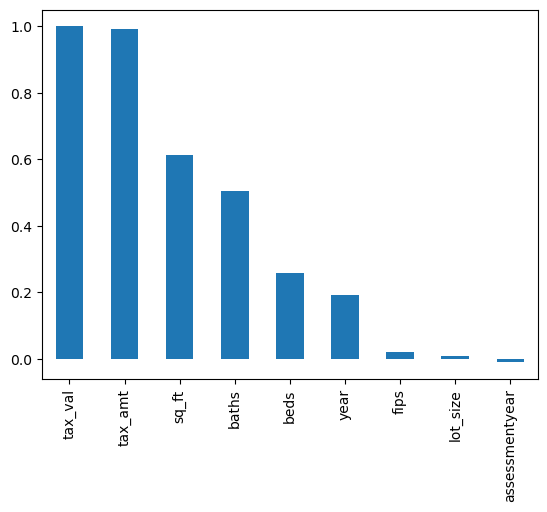

In [17]:
train.corr()['tax_val'].sort_values(ascending= False).plot(kind = 'bar')

<AxesSubplot:>

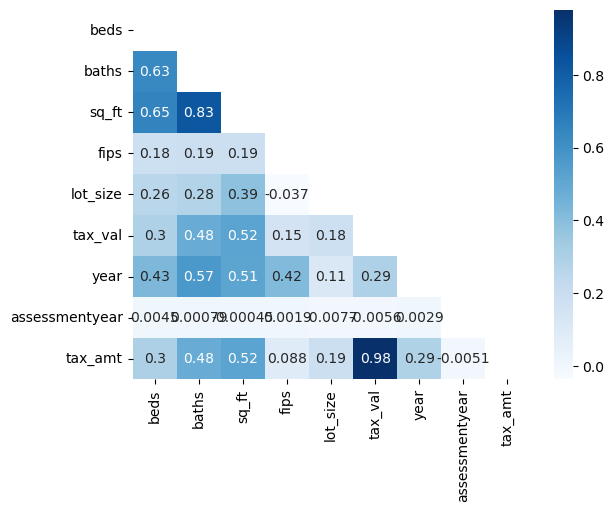

In [18]:
#Visualize correlation
sb.heatmap(corr, cmap='Blues', annot=True, mask=np.triu(corr))

### Bivariate Correlation

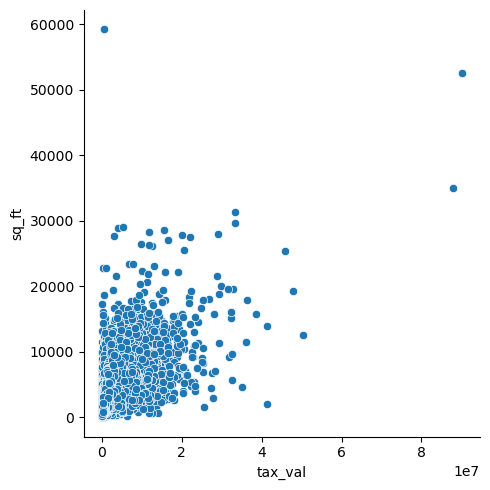

In [19]:
sb.relplot(data=train, y='sq_ft', x='tax_val')

KeyboardInterrupt: 

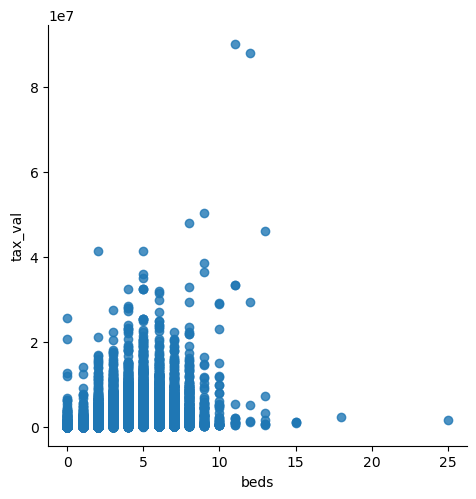

In [20]:
sb.lmplot(data=train, y='tax_val', x='beds')



Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [21]:
cols = zillow.columns.to_list()
cols   

['beds',
 'baths',
 'sq_ft',
 'fips',
 'lot_size',
 'tax_val',
 'year',
 'assessmentyear',
 'tax_amt']

In [22]:
for i, cols in enumerate(cols):
    sb.regplot

#### Exercise 3
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [25]:
def plot_variable_pairs(df):
    
    cols = zillow.columns.values
    for i, col in enumerate(cols):
        for n, col2 in enumerate(cols):
            sb.scatterplot(data=train, x=col, y="tax_val")
            plt.show()

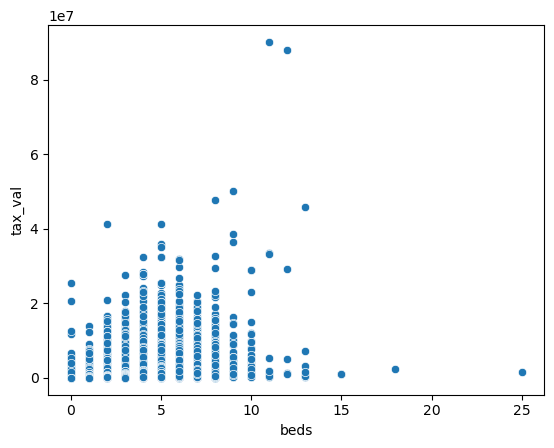

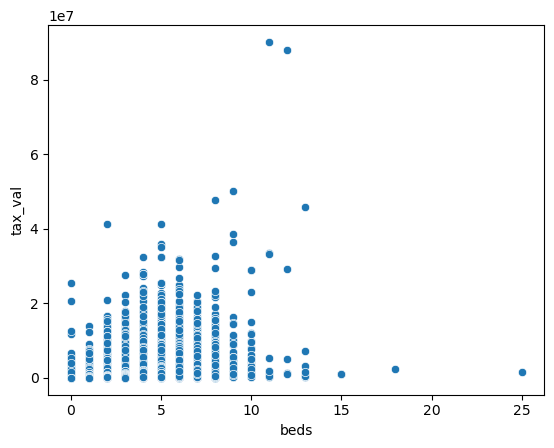

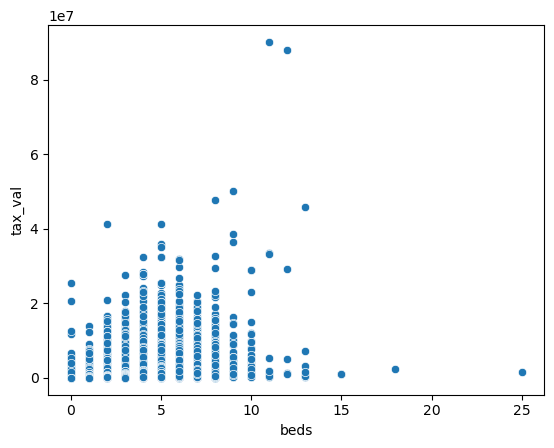

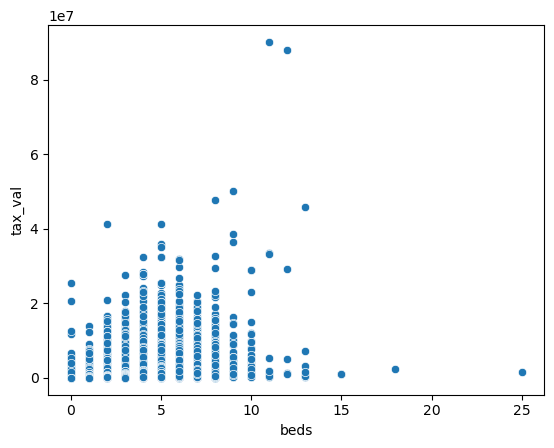

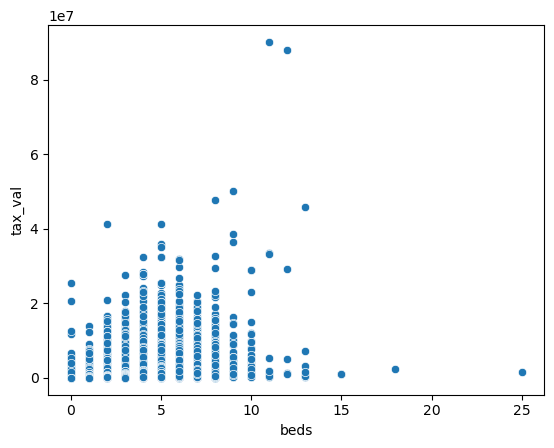

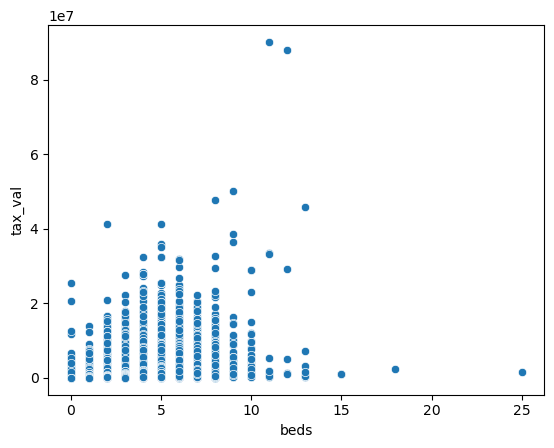

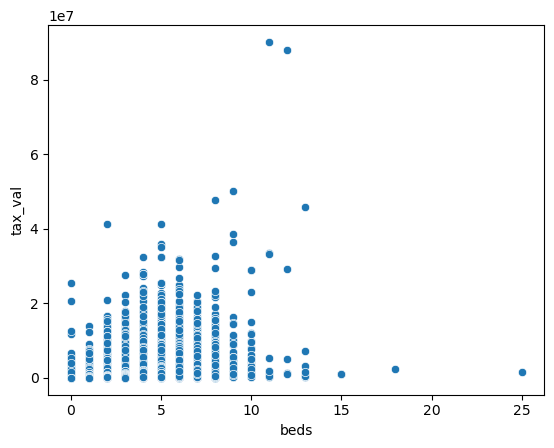

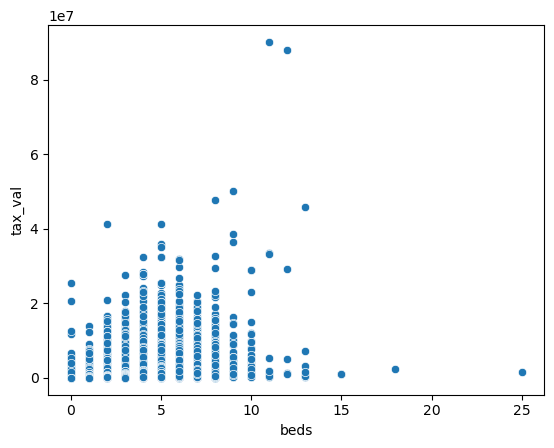

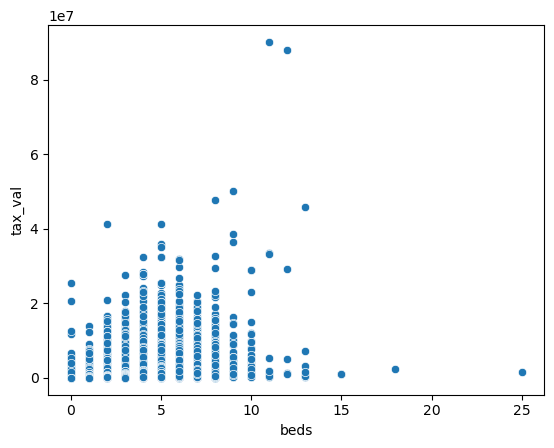

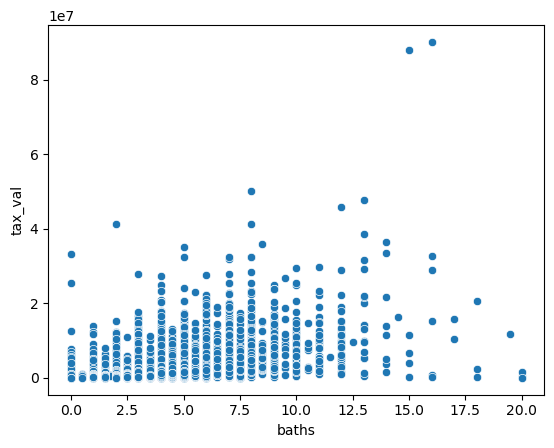

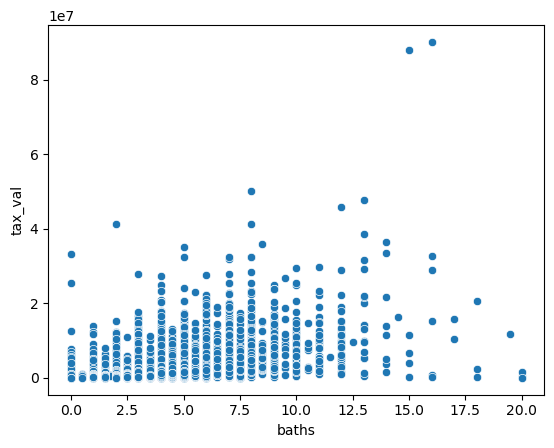

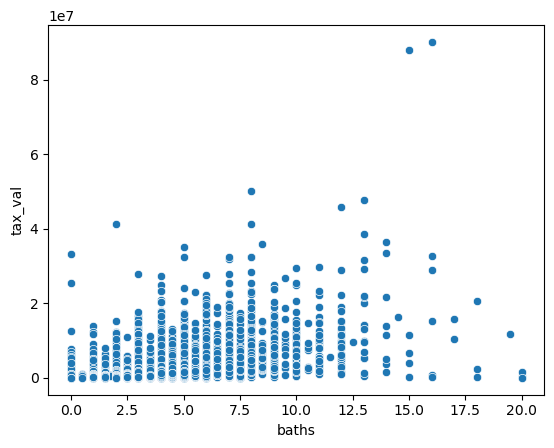

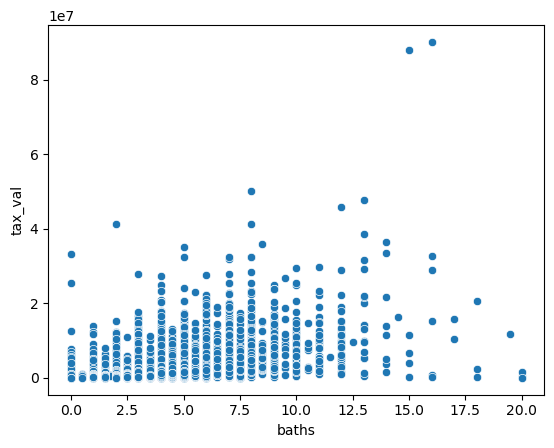

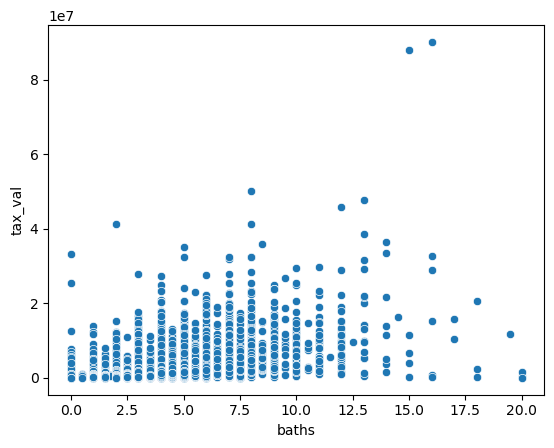

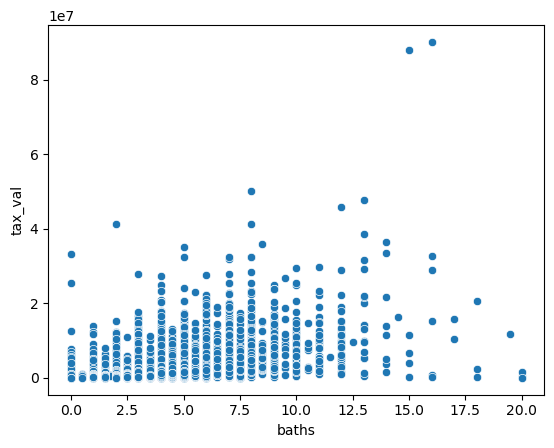

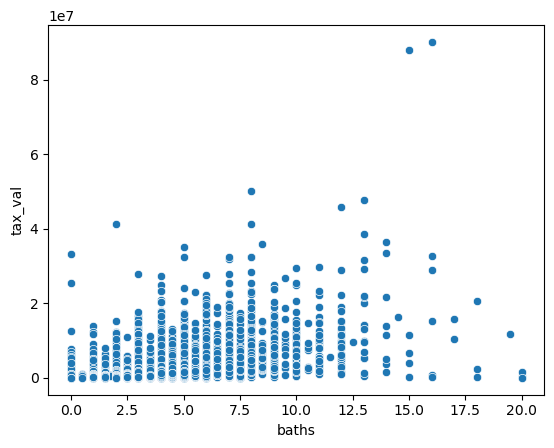

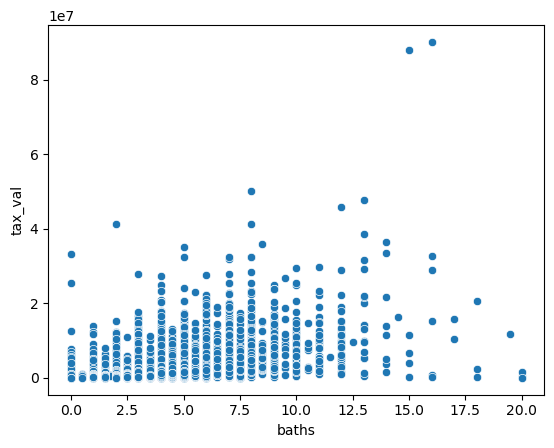

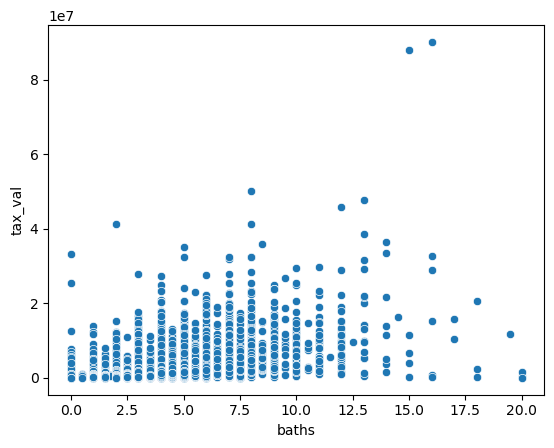

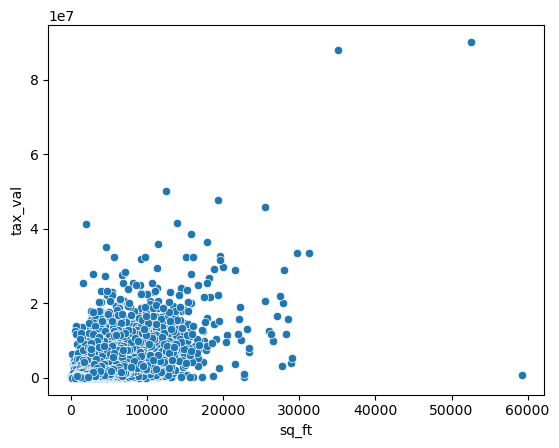

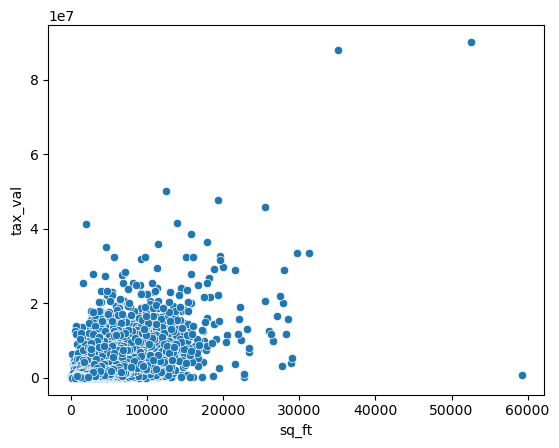

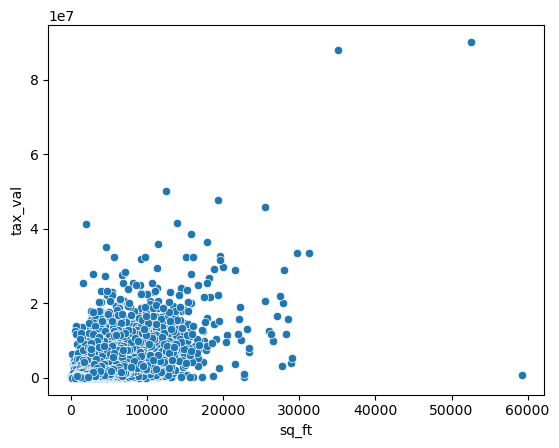

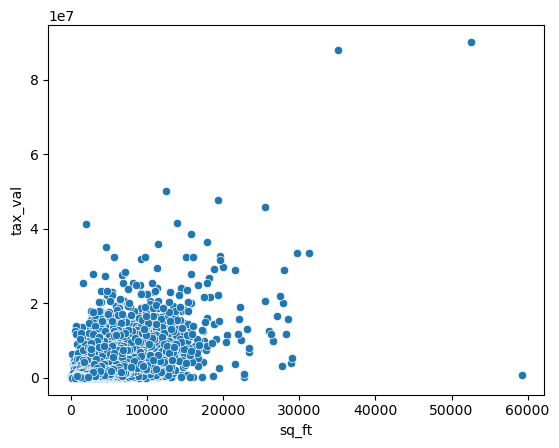

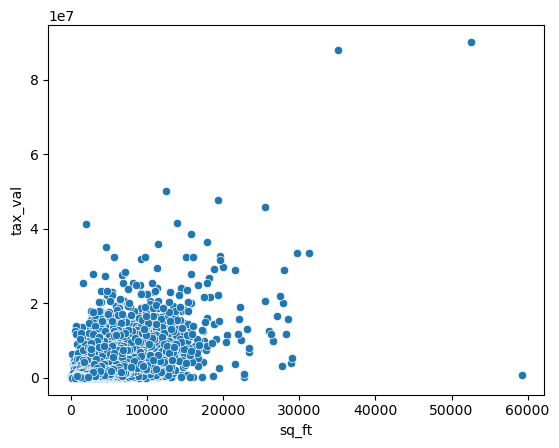

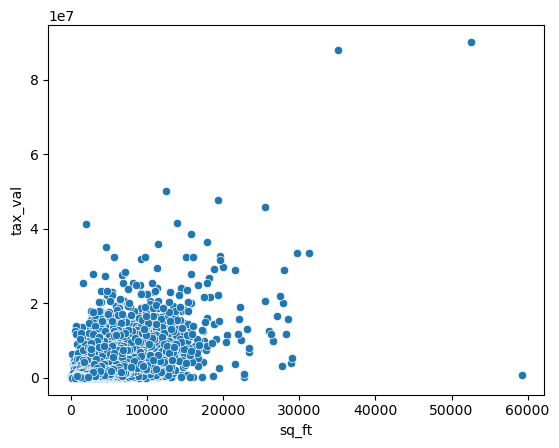

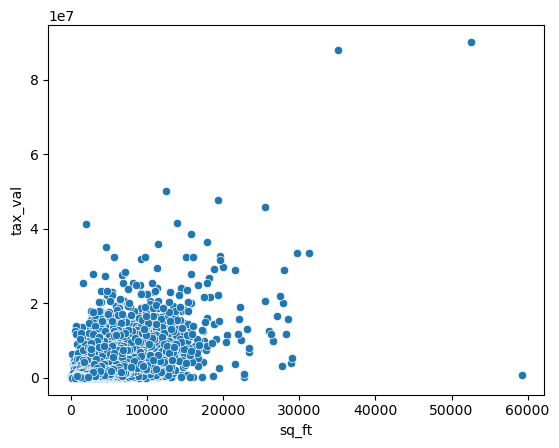

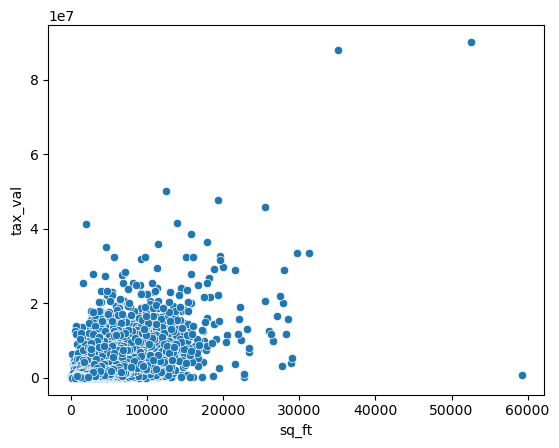

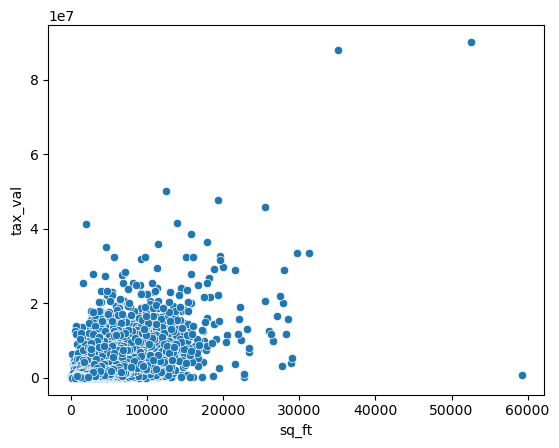

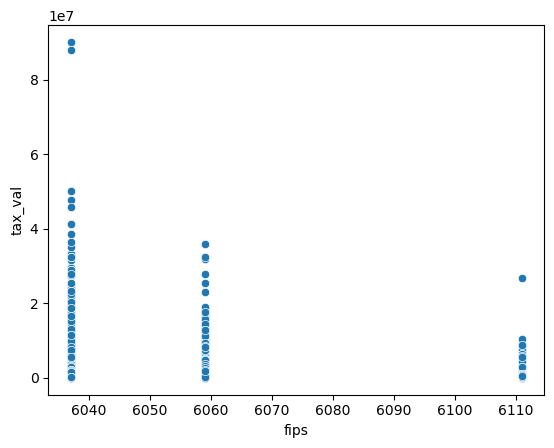

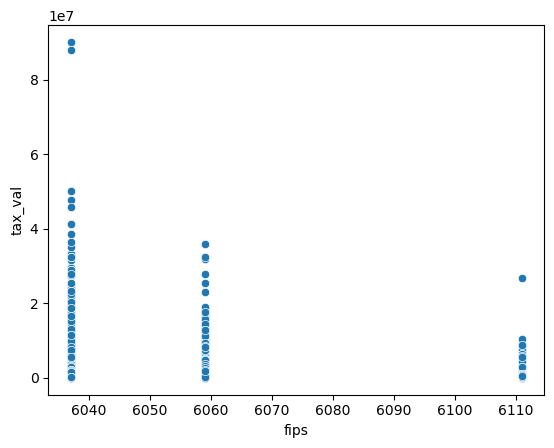

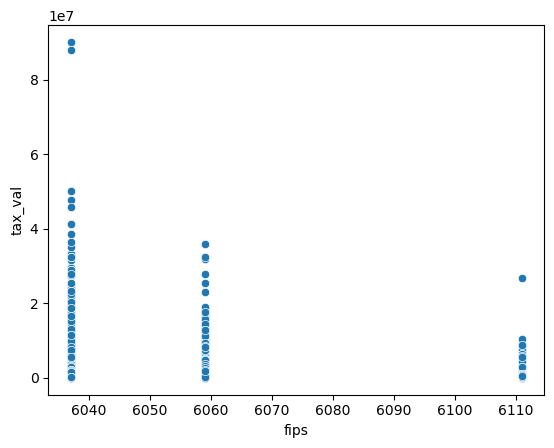

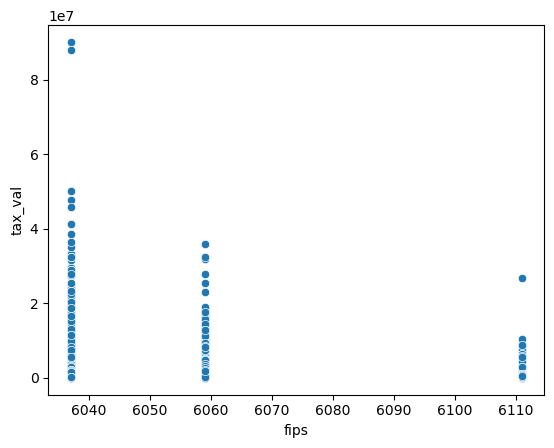

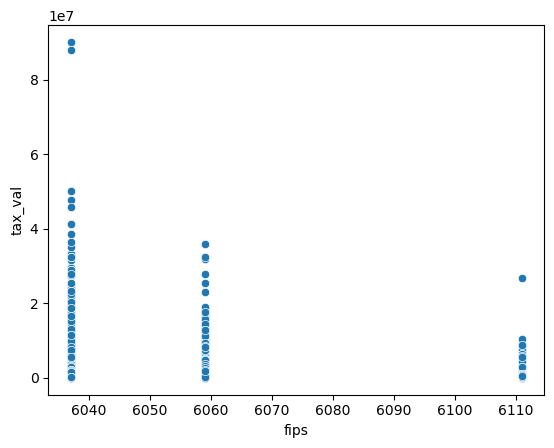

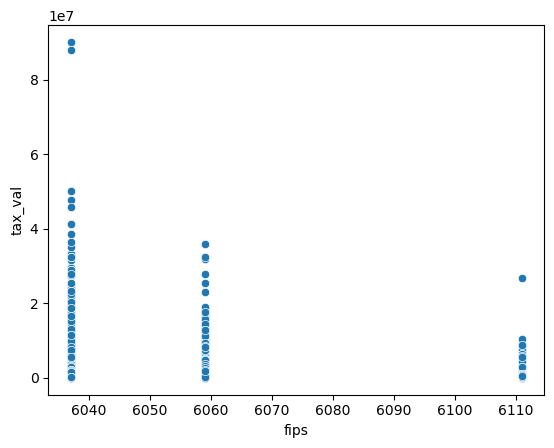

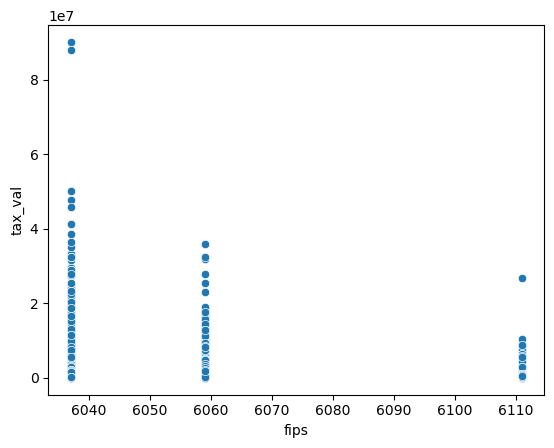

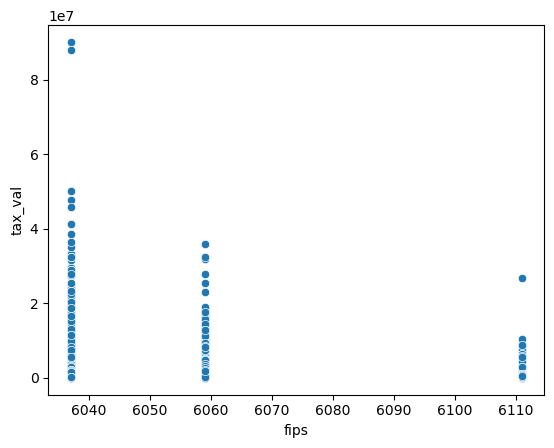

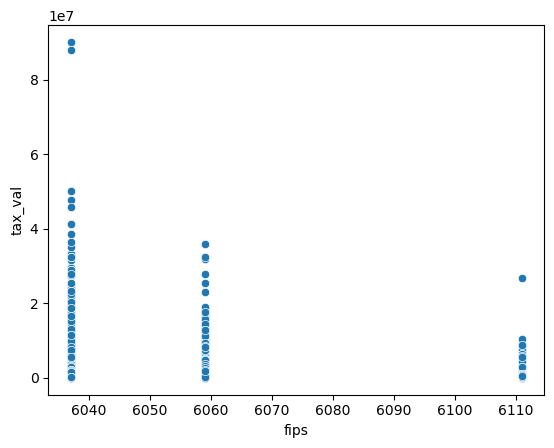

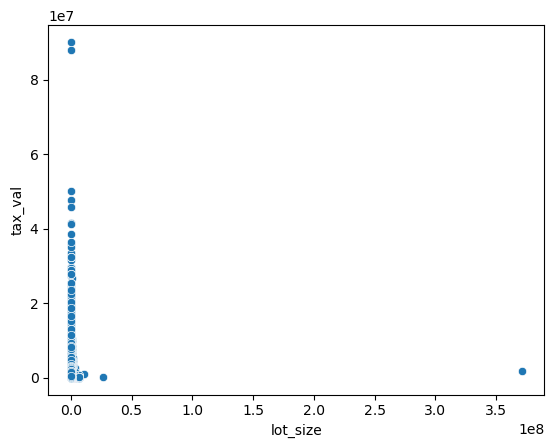

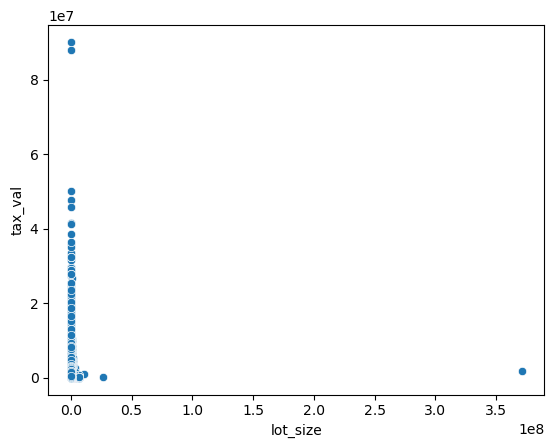

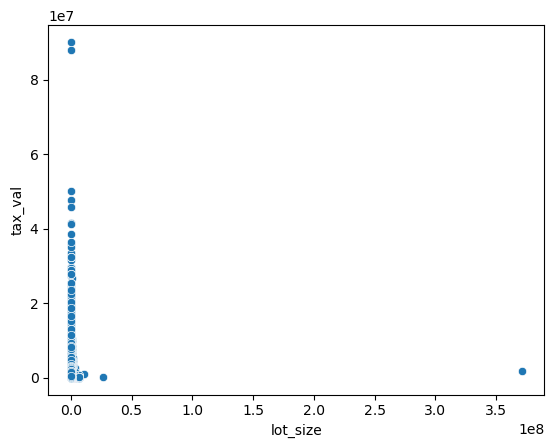

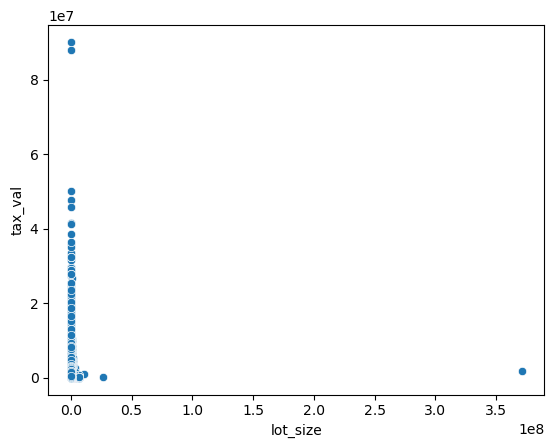

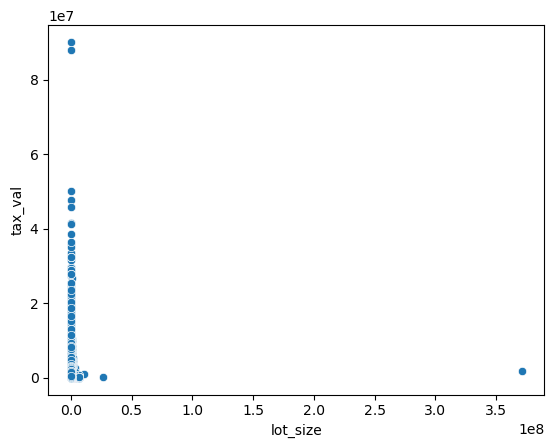

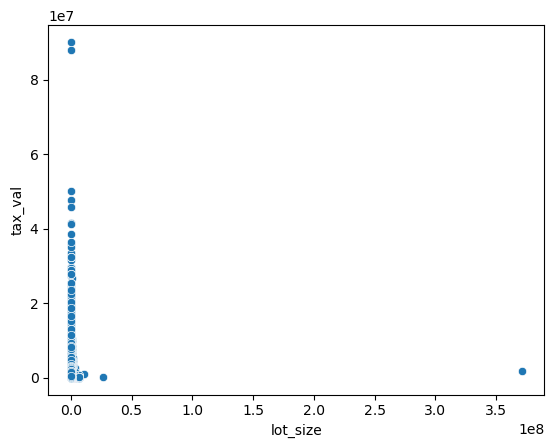

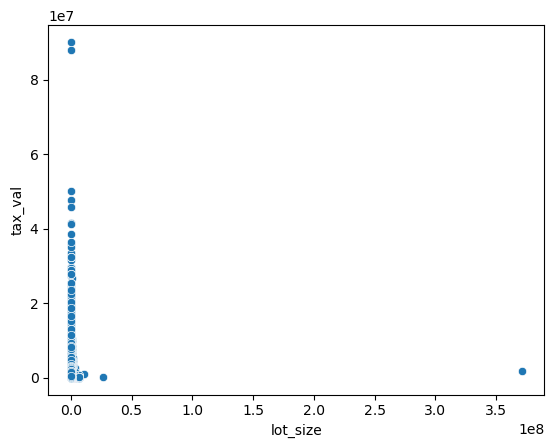

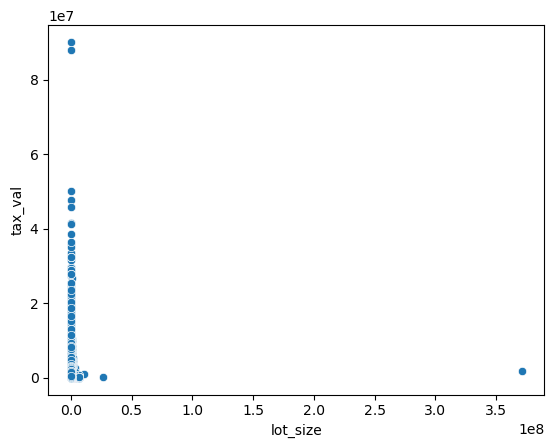

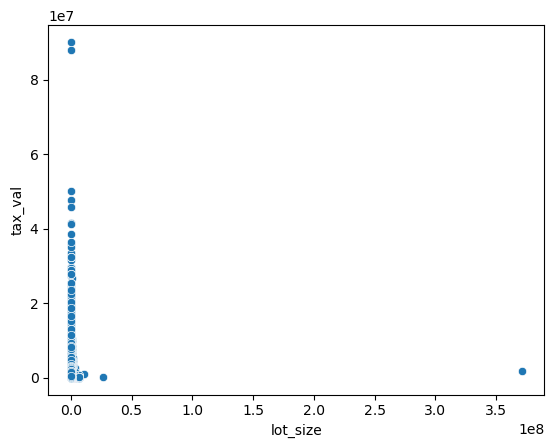

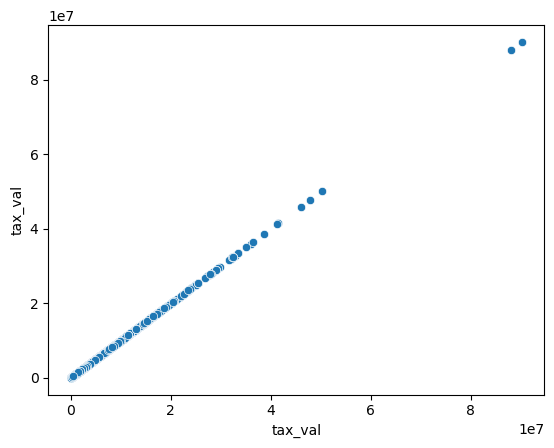

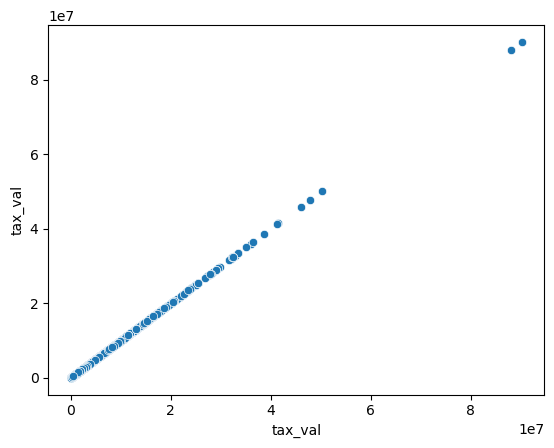

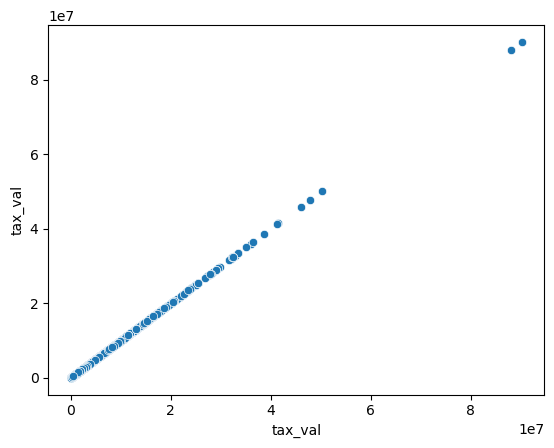

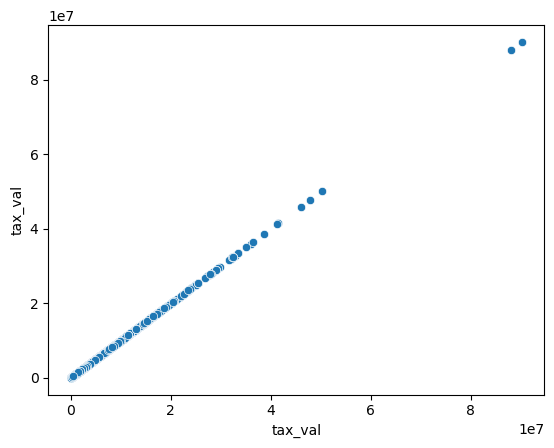

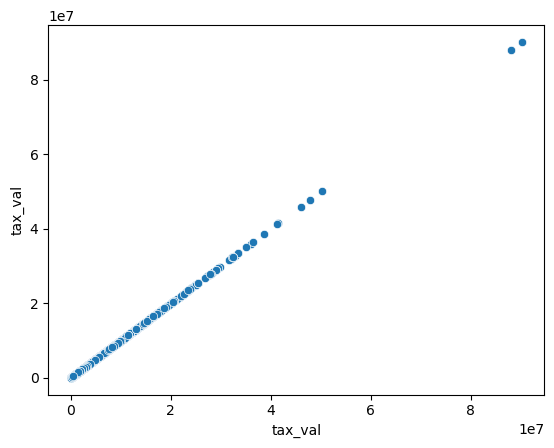

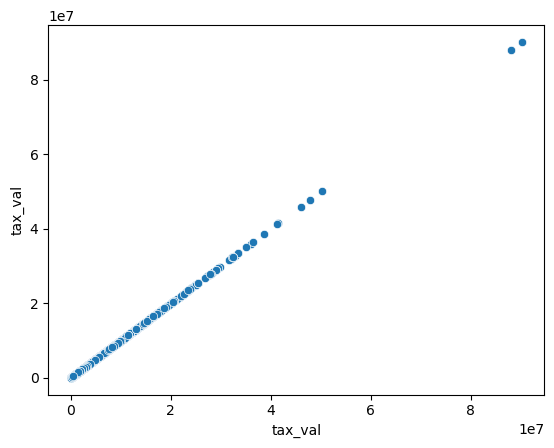

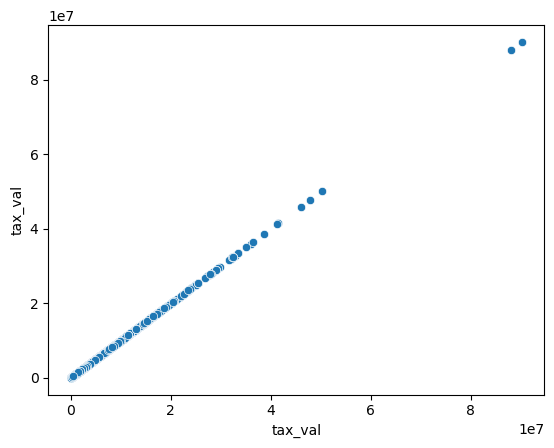

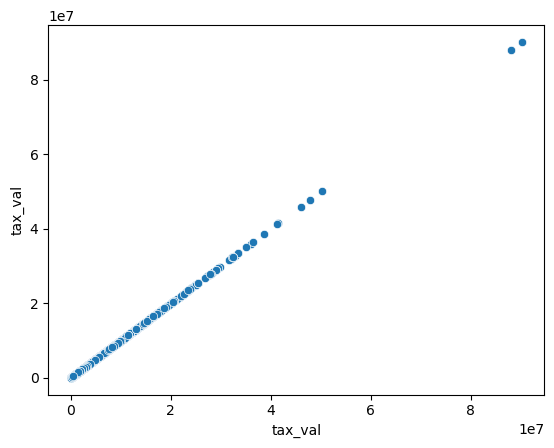

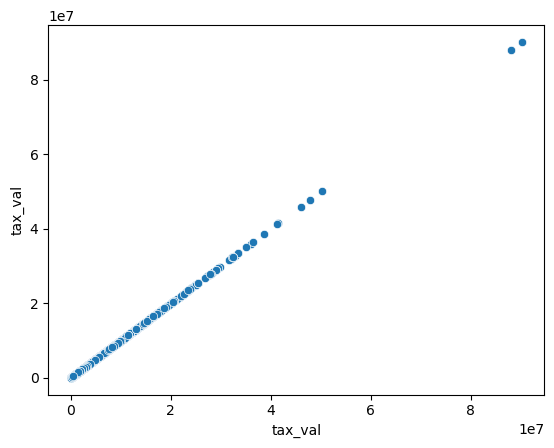

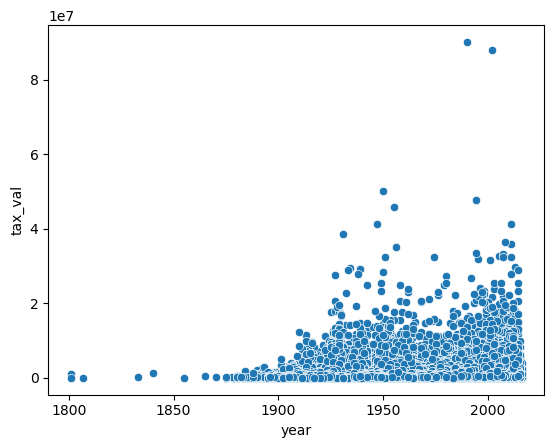

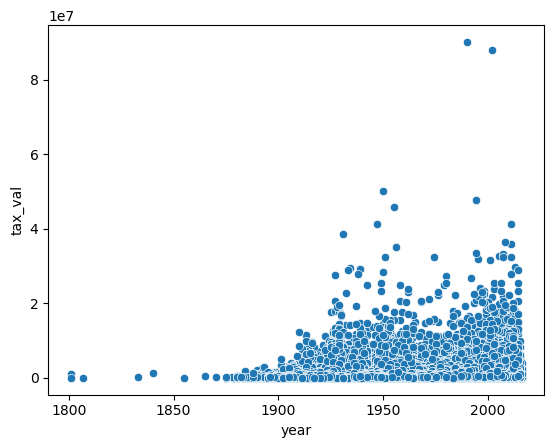

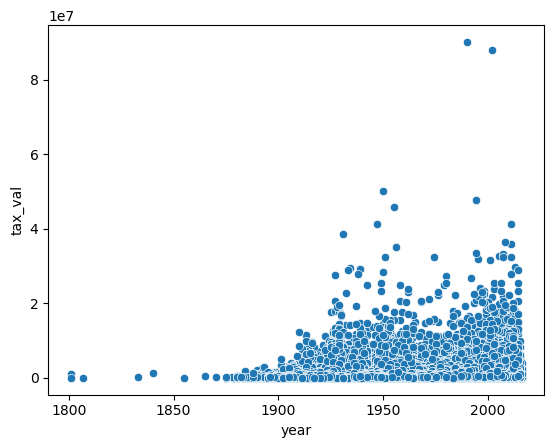

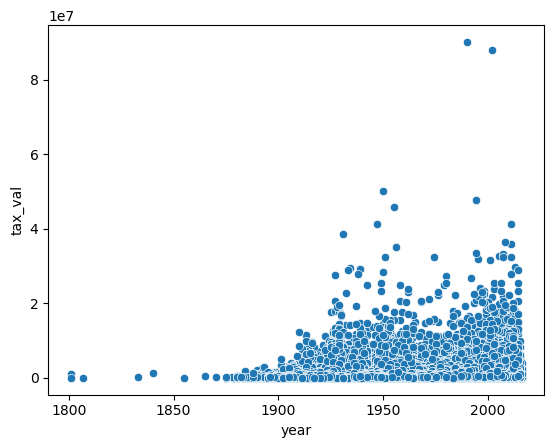

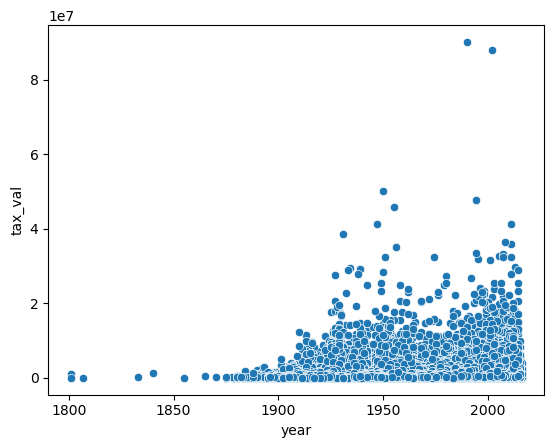

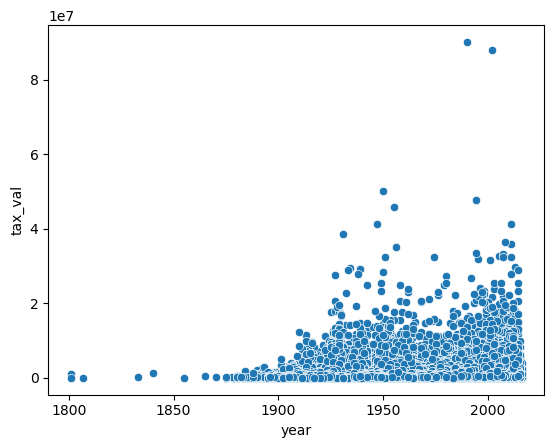

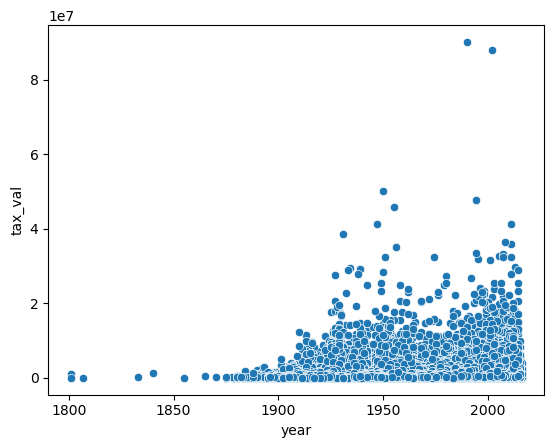

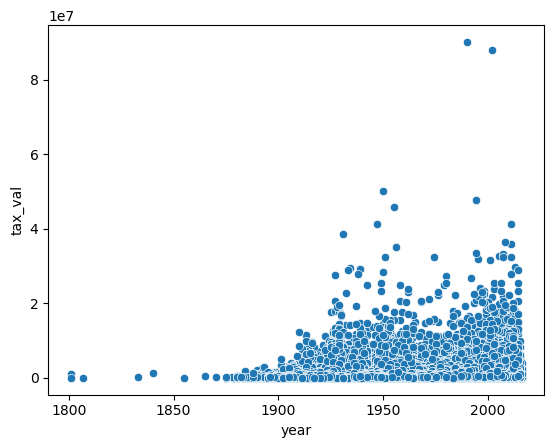

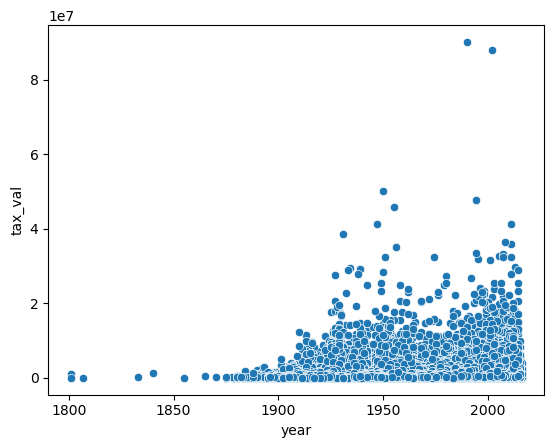

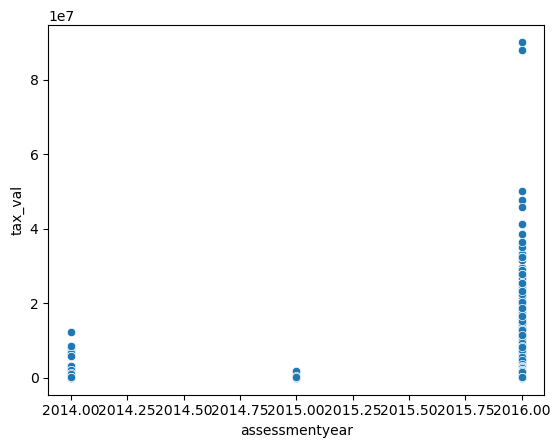

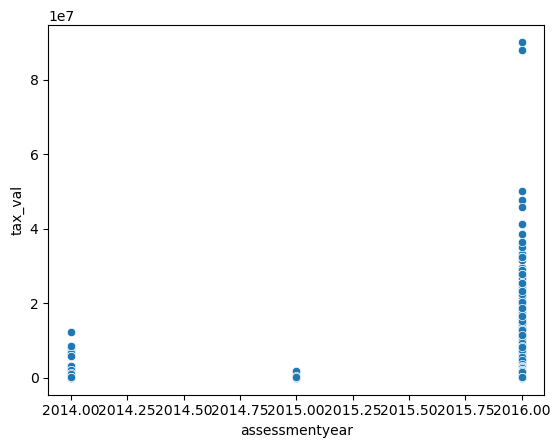

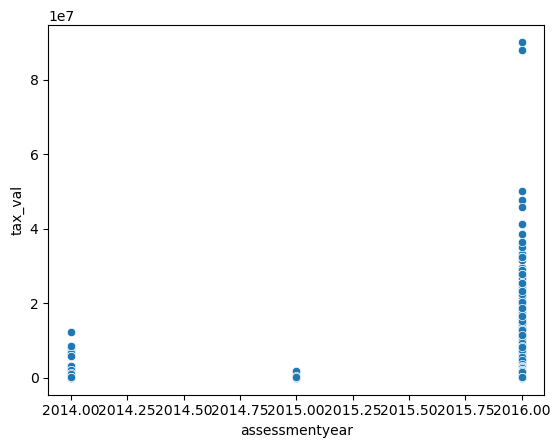

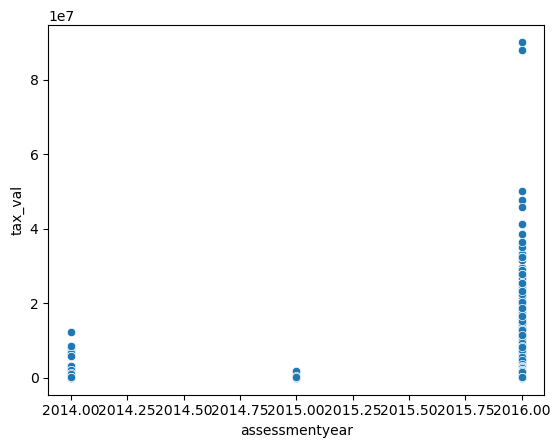

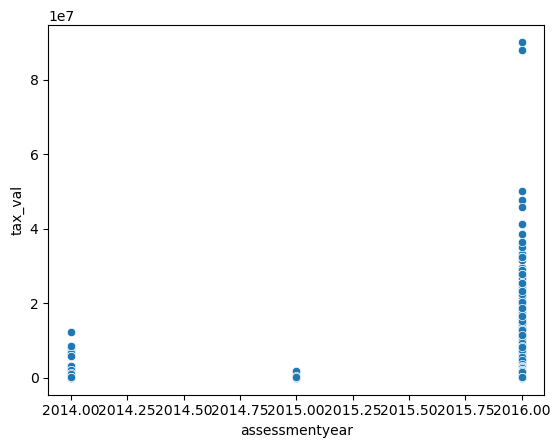

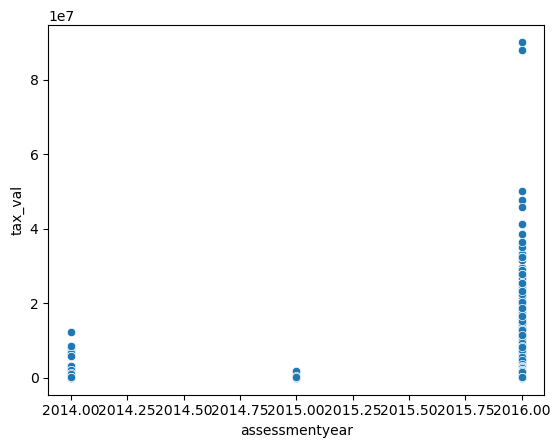

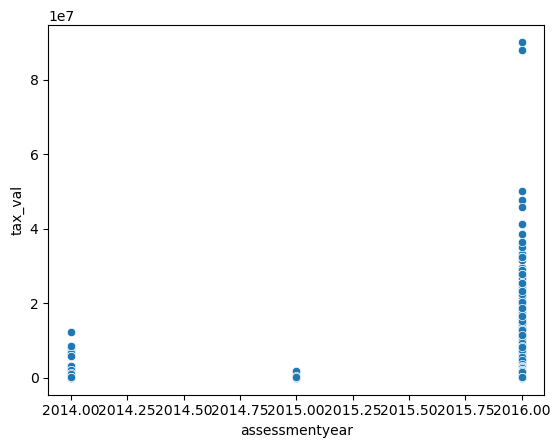

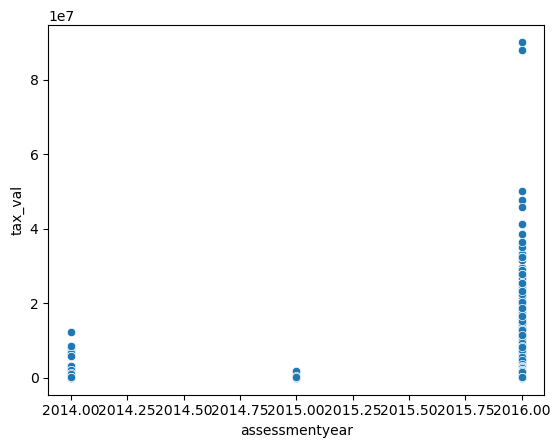

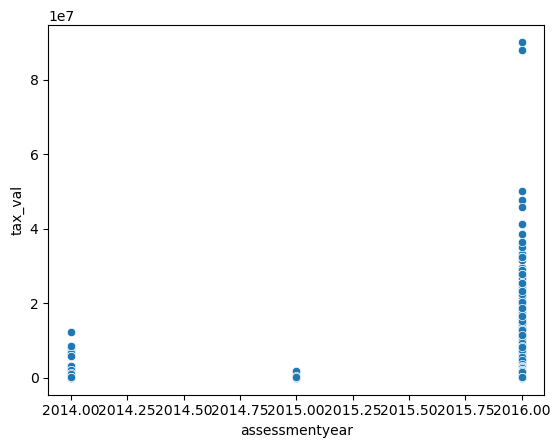

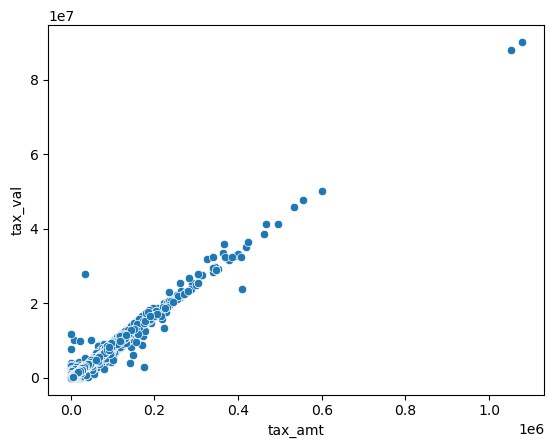

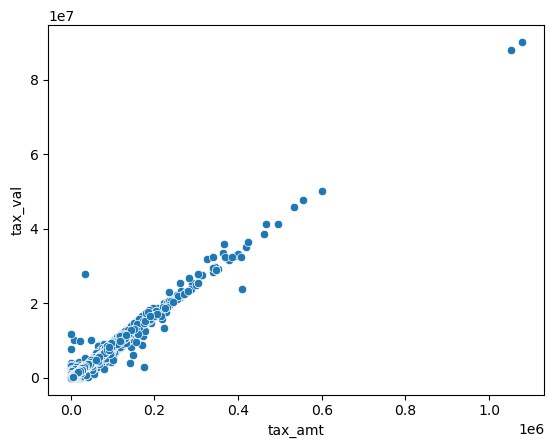

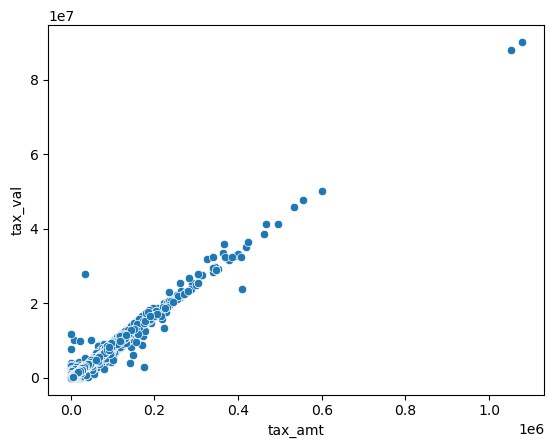

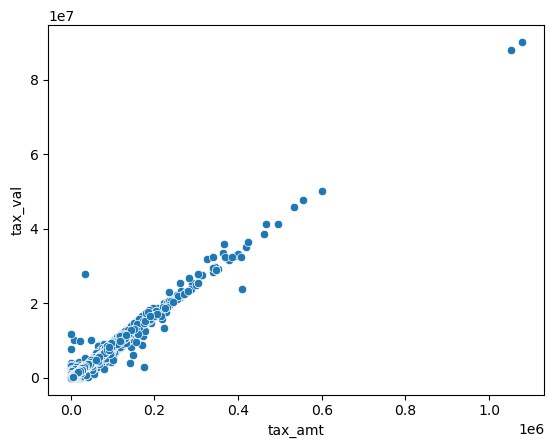

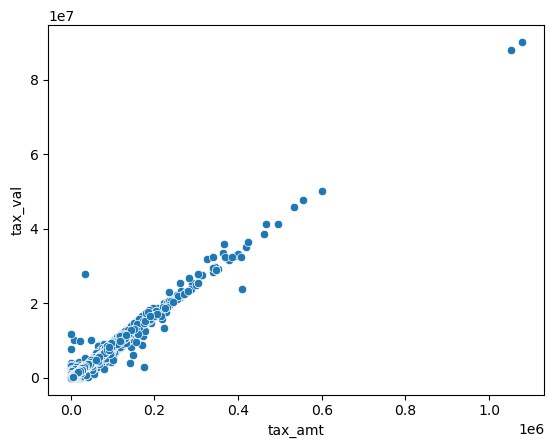

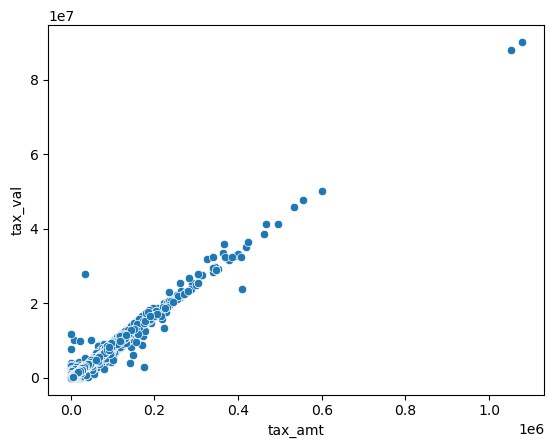

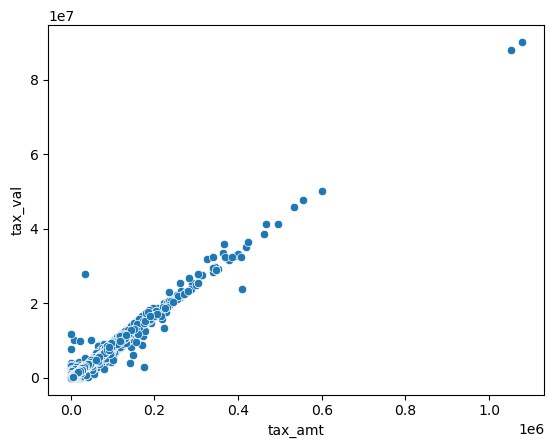

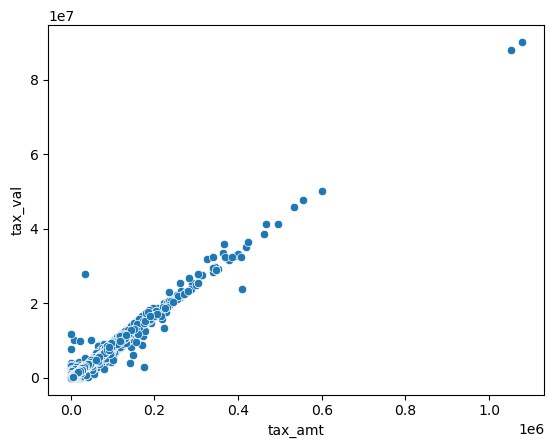

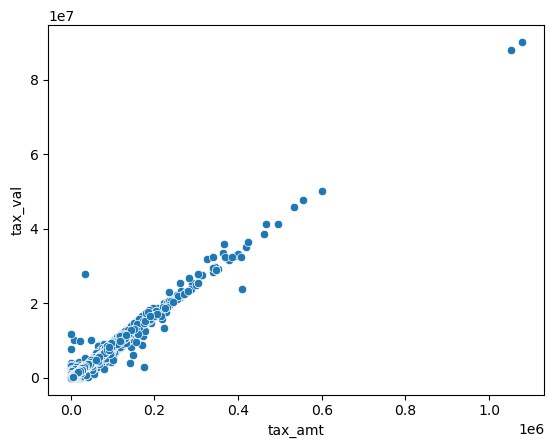

In [26]:
plot_variable_pairs(train)

**Exercise 4**

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [27]:
train.columns

Index(['beds', 'baths', 'sq_ft', 'fips', 'lot_size', 'tax_val', 'year',
       'assessmentyear', 'tax_amt'],
      dtype='object')

In [28]:
cats = ['beds', 'baths']
conts = ['sq_ft', 'tax_val', 'tax_amt', 'year']

In [ ]:
for col in cats:
    for col2 in conts:
        fig, (ax1, ax2, ax3) =plt.subplots(1,3, figsize=(13,4))
        plt.title(f'{col} vs. {col2}')
        sb.boxplot(data= train, x=col, y=col2, ax=ax1 )
        sb.lineplot(data= train, x=col, y=col2, ax=ax2 )
        sb.violinplot(data= train, x=col, y=col2, ax=ax3 )
        plt.show()

In [29]:
def plot_categorical_and_continuous_vars(df):
    cats = ['beds', 'baths']
    conts = ['sq_ft', 'tax_val', 'tax_amt', 'year']
    for col in cats:
        for col2 in conts:
            fig, (ax1, ax2, ax3) =plt.subplots(1,3, figsize=(13,4))
            plt.title(f'{col} vs. {col2}')
            sb.boxplot(data= train, x=col, y=col2, ax=ax1 )
            sb.lineplot(data= train, x=col, y=col2, ax=ax2 )
            sb.violinplot(data= train, x=col, y=col2, ax=ax3 )
            plt.show()

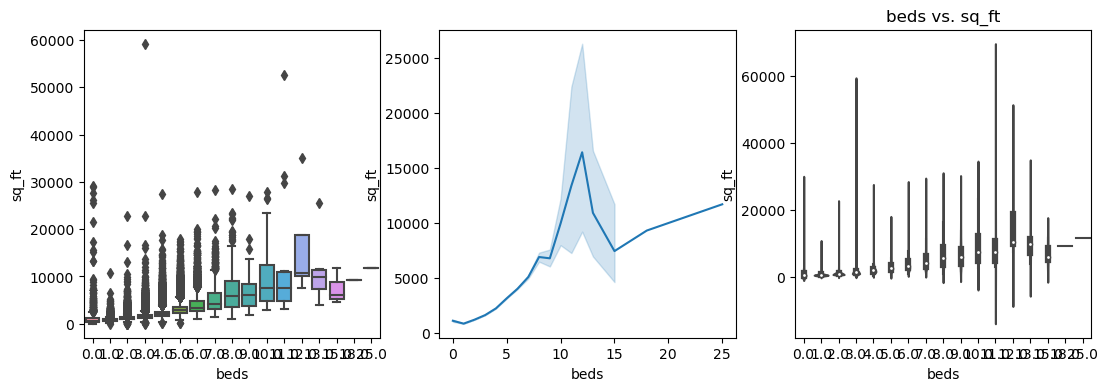

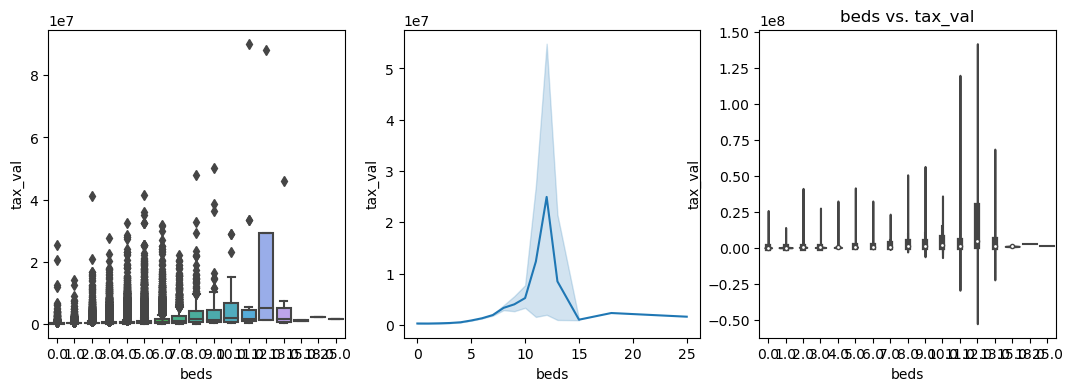

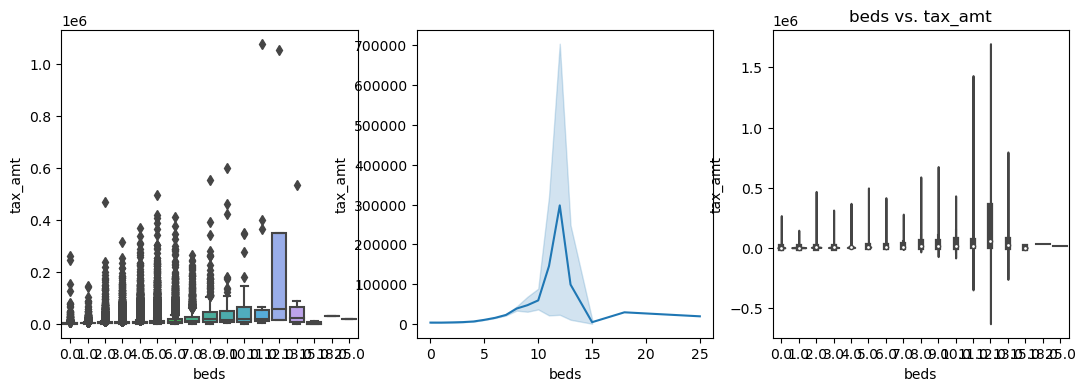

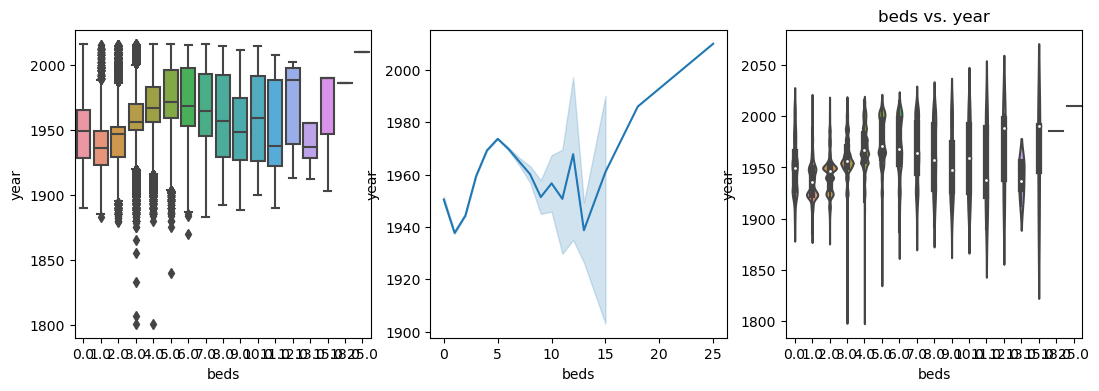

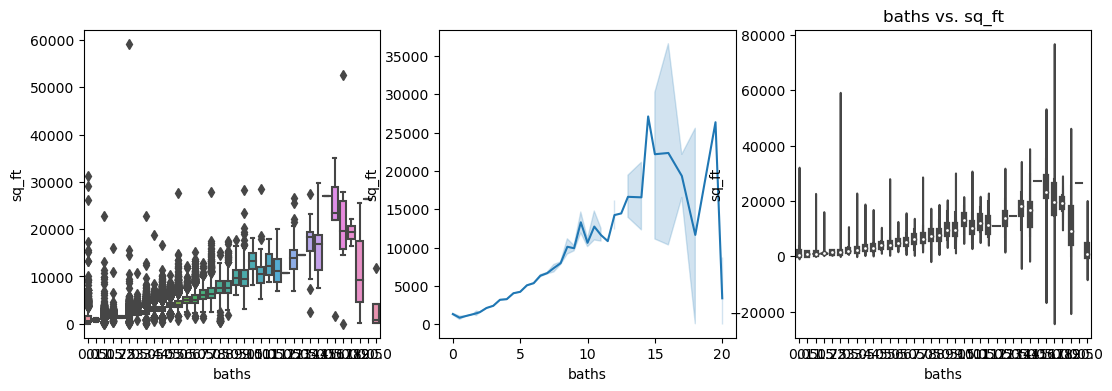

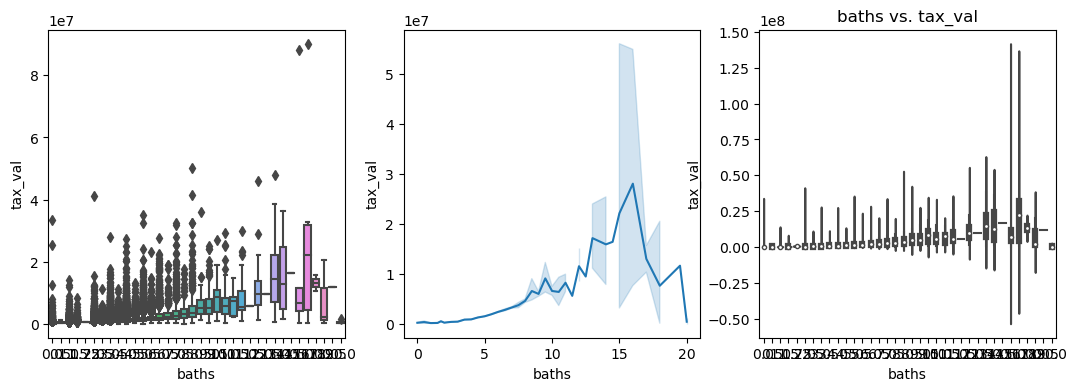

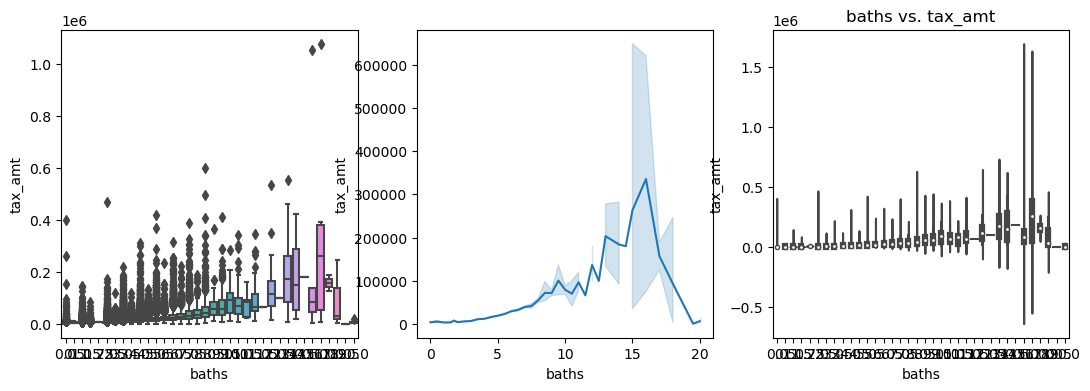

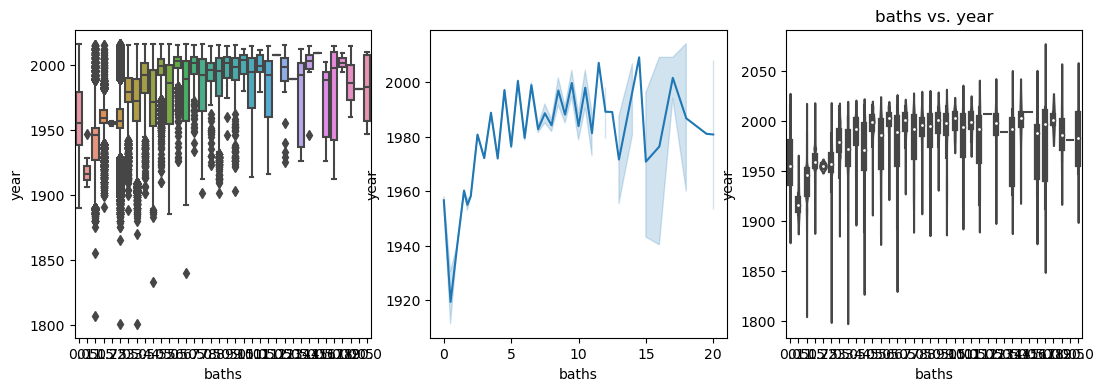

In [30]:
plot_categorical_and_continuous_vars(train)

In [ ]:
train.tax_val

**Exercise 7** 

Come up with some initial hypotheses based on your goal of predicting property value.
Visualize all combinations of variables in some way.
(See above Exercise 3)